# Intro

In [1]:
import pandas as pd

from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

%matplotlib inline

In [2]:
# Read the raw ames data
df_raw = pd.read_csv("data/AmesHousing.csv",
                     keep_default_na = False, # do not accept the default values for NULL (e.g., 'NA')
                     na_values=[''])          # recognize only blank spaces as NULL

In [3]:
# Display (rows, cols) of ames data
df_raw.shape

(2930, 82)

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
Order              2930 non-null int64
PID                2930 non-null int64
MS SubClass        2930 non-null int64
MS Zoning          2930 non-null object
Lot Frontage       2440 non-null float64
Lot Area           2930 non-null int64
Street             2930 non-null object
Alley              2930 non-null object
Lot Shape          2930 non-null object
Land Contour       2930 non-null object
Utilities          2930 non-null object
Lot Config         2930 non-null object
Land Slope         2930 non-null object
Neighborhood       2930 non-null object
Condition 1        2930 non-null object
Condition 2        2930 non-null object
Bldg Type          2930 non-null object
House Style        2930 non-null object
Overall Qual       2930 non-null int64
Overall Cond       2930 non-null int64
Year Built         2930 non-null int64
Year Remod/Add     2930 non-null int64
Roof Style         2

# Prep

In [5]:
# Create DataFrame 'df' as a copy from 'df_raw'
df = df_raw.copy()

## Author's suggestions

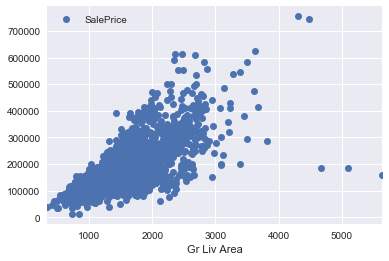

In [6]:
df.plot( 'Gr Liv Area', 'SalePrice', linestyle='none', marker='o')
plt.show()

Get rid of the 5 outliers by removing any houses with more than 4,000 square feet.

In [7]:
df = df[df['Gr Liv Area'] <= 4000]

## Dealing with missing values

In [8]:
# Create DataFrame 'missings' containing the 'column's and the number of 'missing's for each column
missings = df.isnull().sum().rename_axis('column').reset_index(name='missings')

# - Only keep columns that have missing values and
# - sort by number of missing values in ascending order
missings = missings[missings['missings'] > 0].sort_values(by='missings', ascending=False).reset_index(drop=True)

# Display the 10 columns with the highest number of missing values
missings[:10]

,column,missings
0,Lot Frontage,490
1,Garage Yr Blt,159
2,Mas Vnr Area,23
3,Mas Vnr Type,23
4,Bsmt Exposure,4
5,Bsmt Full Bath,2
6,Garage Finish,2
7,BsmtFin Type 2,2
8,Bsmt Half Bath,2
9,Garage Qual,1


## Categorical variables

### Nominal variables

In [9]:
# Save the names of all nominal variables in list 'nominal_cols'
nominal_cols = ['MS SubClass', 'MS Zoning', 'Street', 'Alley', 'Land Contour', 'Lot Config',
                'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style',
                'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Foundation',
                'Heating', 'Central Air', 'Garage Type', 'Misc Feature', 'Sale Type', 'Sale Condition']

In [10]:
# Make sure the datatype of the nominal variables is 'category'
for col in nominal_cols:
    df[col] = df[col].astype('category')

# Display 1st 5 rows of all nominal variables
df[nominal_cols].head()

,MS SubClass,MS Zoning,Street,Alley,Land Contour,Lot Config,Neighborhood,Condition 1,Condition 2,Bldg Type,...,Exterior 1st,Exterior 2nd,Mas Vnr Type,Foundation,Heating,Central Air,Garage Type,Misc Feature,Sale Type,Sale Condition
0,20,RL,Pave,NA,Lvl,Corner,NAmes,Norm,Norm,1Fam,...,BrkFace,Plywood,Stone,CBlock,GasA,Y,Attchd,NA,WD,Normal
1,20,RH,Pave,NA,Lvl,Inside,NAmes,Feedr,Norm,1Fam,...,VinylSd,VinylSd,None,CBlock,GasA,Y,Attchd,NA,WD,Normal
2,20,RL,Pave,NA,Lvl,Corner,NAmes,Norm,Norm,1Fam,...,Wd Sdng,Wd Sdng,BrkFace,CBlock,GasA,Y,Attchd,Gar2,WD,Normal
3,20,RL,Pave,NA,Lvl,Corner,NAmes,Norm,Norm,1Fam,...,BrkFace,BrkFace,None,CBlock,GasA,Y,Attchd,NA,WD,Normal
4,60,RL,Pave,NA,Lvl,Inside,Gilbert,Norm,Norm,1Fam,...,VinylSd,VinylSd,None,PConc,GasA,Y,Attchd,NA,WD,Normal


In [11]:
# Verify data type
df[nominal_cols].dtypes

MS SubClass       category
MS Zoning         category
Street            category
Alley             category
Land Contour      category
Lot Config        category
Neighborhood      category
Condition 1       category
Condition 2       category
Bldg Type         category
House Style       category
Roof Style        category
Roof Matl         category
Exterior 1st      category
Exterior 2nd      category
Mas Vnr Type      category
Foundation        category
Heating           category
Central Air       category
Garage Type       category
Misc Feature      category
Sale Type         category
Sale Condition    category
dtype: object

### Ordinal variables

In [12]:
# "Standard" categories that apply to several ordinal variables
stndrd_cat = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']

# Ordinal variables that all share the same categories saved in list 'stndrd_cat'
stndrd_cat_cols = ['Exter Qual', 'Exter Cond',
                   'Garage Qual', 'Garage Cond',
                   'Bsmt Qual', 'Bsmt Cond',
                   'Heating QC', 'Kitchen Qual']

# Assign "standard" categories to "standard" ordinal variables
for col in stndrd_cat_cols:
    df[col] = df[col].astype(CategoricalDtype(categories=stndrd_cat, ordered=True))

In [13]:
# Assign categories to the other ordinal variables

df['Bsmt Exposure'] = df['Bsmt Exposure'].astype(CategoricalDtype(categories=['No', 'Mn', 'Av', 'Gd'], ordered=True))

levels_BsmtFinTypes = ['Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
df['BsmtFin Type 1'] = df['BsmtFin Type 1'].astype(CategoricalDtype(categories=levels_BsmtFinTypes, ordered=True))
df['BsmtFin Type 2'] = df['BsmtFin Type 2'].astype(CategoricalDtype(categories=levels_BsmtFinTypes, ordered=True))

df['Functional'] = df['Functional'].astype(CategoricalDtype(categories=['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'], ordered=True))

df['Garage Finish'] = df['Garage Finish'].astype(CategoricalDtype(categories=['Unf', 'RFn', 'Fin'], ordered=True))

In [14]:
# Save all ordinal variables in list 'ordinal_cols'
ordinal_cols = stndrd_cat_cols + ['Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2',
                                  'Functional','Garage Finish']

# Display 1st 5 rows of all ordinal variables
df[ordinal_cols].head()

,Exter Qual,Exter Cond,Garage Qual,Garage Cond,Bsmt Qual,Bsmt Cond,Heating QC,Kitchen Qual,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Functional,Garage Finish
0,TA,TA,TA,TA,TA,Gd,Fa,TA,Gd,BLQ,Unf,Typ,Fin
1,TA,TA,TA,TA,TA,TA,TA,TA,No,Rec,LwQ,Typ,Unf
2,TA,TA,TA,TA,TA,TA,TA,Gd,No,ALQ,Unf,Typ,Unf
3,Gd,TA,TA,TA,TA,TA,Ex,Ex,No,ALQ,Unf,Typ,Fin
4,TA,TA,TA,TA,Gd,TA,Gd,TA,No,GLQ,Unf,Typ,Fin


In [15]:
# Verify datatype
df[ordinal_cols].dtypes

Exter Qual        category
Exter Cond        category
Garage Qual       category
Garage Cond       category
Bsmt Qual         category
Bsmt Cond         category
Heating QC        category
Kitchen Qual      category
Bsmt Exposure     category
BsmtFin Type 1    category
BsmtFin Type 2    category
Functional        category
Garage Finish     category
dtype: object

## Continuous variables

In [16]:
continuous_cols = ['SalePrice',
                   'Lot Frontage', 'Lot Area',
                   'Mas Vnr Area',
                   'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
                   '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
                   'Garage Area', 'Wood Deck SF',
                   'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val']

# Display 1st 5 rows of all continuous variables
df[continuous_cols].head()

,SalePrice,Lot Frontage,Lot Area,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val
0,215000,141.0,31770,112.0,639.0,0.0,441.0,1080.0,1656,0,0,1656,528.0,210,62,0,0,0,0,0
1,105000,80.0,11622,0.0,468.0,144.0,270.0,882.0,896,0,0,896,730.0,140,0,0,0,120,0,0
2,172000,81.0,14267,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,312.0,393,36,0,0,0,0,12500
3,244000,93.0,11160,0.0,1065.0,0.0,1045.0,2110.0,2110,0,0,2110,522.0,0,0,0,0,0,0,0
4,189900,74.0,13830,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,482.0,212,34,0,0,0,0,0


In [17]:
# Verify data types
df[continuous_cols].dtypes

SalePrice            int64
Lot Frontage       float64
Lot Area             int64
Mas Vnr Area       float64
BsmtFin SF 1       float64
BsmtFin SF 2       float64
Bsmt Unf SF        float64
Total Bsmt SF      float64
1st Flr SF           int64
2nd Flr SF           int64
Low Qual Fin SF      int64
Gr Liv Area          int64
Garage Area        float64
Wood Deck SF         int64
Open Porch SF        int64
Enclosed Porch       int64
3Ssn Porch           int64
Screen Porch         int64
Pool Area            int64
Misc Val             int64
dtype: object